In [1]:
!pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 98.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0

In [2]:
import pandas as pd
import numpy as np
import keras
from keras import layers
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Activation, Flatten, Dropout, Rescaling, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from google.colab import drive, files
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from PIL import Image
import seaborn as sns
sns.set_style()
%matplotlib inline


In [3]:
print(tf.__version__)

2.12.0


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip -q '/content/drive/MyDrive/test_w_labels.zip'

In [6]:
!unzip -q '/content/drive/MyDrive/train_w_labels.zip'

In [7]:
!unzip -q '/content/drive/MyDrive/val_w_labels.zip'

In [8]:
column_labels = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta']
train_dataset = image_dataset_from_directory(
    '/content/train_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=128,
    image_size=(70,70),
    shuffle=True,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 91166 files belonging to 15 classes.


In [9]:
val_dataset = image_dataset_from_directory(
    '/content/val_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=128,
    image_size=(70,70),
    shuffle=True,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 7500 files belonging to 15 classes.


In [10]:
column_labels = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta']
test_dataset = image_dataset_from_directory(
    '/content/test_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=128,
    image_size=(70,70),
    shuffle=False,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 7500 files belonging to 15 classes.


In [11]:
normalization_layer = layers.Rescaling(1./255)
train_ds_norm = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))
val_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [12]:
# Setting up model
img_width, img_height = 70, 70


nb_train_samples = 91166
nb_validation_samples = 7500
epochs = 200
batch_size = 128
n_classes = 15
input_shape= (img_width, img_height, 1)

 9_27_01d

In [13]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='/content/drive/MyDrive/keras/final_model.keras',
        save_best_only=True,
        monitor='val_loss'
    )]

In [15]:
history = model.fit(
    x=train_ds_norm,
    y=None,
    validation_data= val_ds_norm,
    epochs=epochs,
    verbose="auto",
    callbacks=callbacks,
    validation_split=0.0,
    shuffle=True,
    validation_freq=1,
    batch_size = batch_size
    )

Epoch 1/200
713/713 [==============================] - 36s 32ms/step - loss: 1.7586 - accuracy: 0.4532 - val_loss: 1.4314 - val_accuracy: 0.5440
Epoch 2/200
713/713 [==============================] - 22s 31ms/step - loss: 1.1926 - accuracy: 0.6171 - val_loss: 1.0050 - val_accuracy: 0.6659
Epoch 3/200
713/713 [==============================] - 22s 31ms/step - loss: 1.0540 - accuracy: 0.6621 - val_loss: 0.9075 - val_accuracy: 0.6924
Epoch 4/200
713/713 [==============================] - 22s 31ms/step - loss: 0.9677 - accuracy: 0.6891 - val_loss: 0.8251 - val_accuracy: 0.7232
Epoch 5/200
713/713 [==============================] - 22s 31ms/step - loss: 0.9152 - accuracy: 0.7051 - val_loss: 0.8810 - val_accuracy: 0.7107
Epoch 6/200
713/713 [==============================] - 22s 31ms/step - loss: 0.8758 - accuracy: 0.7186 - val_loss: 0.8029 - val_accuracy: 0.7321
Epoch 7/200
713/713 [==============================] - 22s 31ms/step - loss: 0.8479 - accuracy: 0.7281 - val_loss: 0.7800 - val_ac

In [16]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 1s - loss: 0.5238 - accuracy: 0.8297 - 1s/epoch - 25ms/step


In [17]:
model.load_weights('/content/drive/MyDrive/keras/final_model.keras')

In [18]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 1s - loss: 0.5048 - accuracy: 0.8373 - 1s/epoch - 25ms/step


In [19]:
model.save(f'/content/drive/MyDrive/final_model.keras')

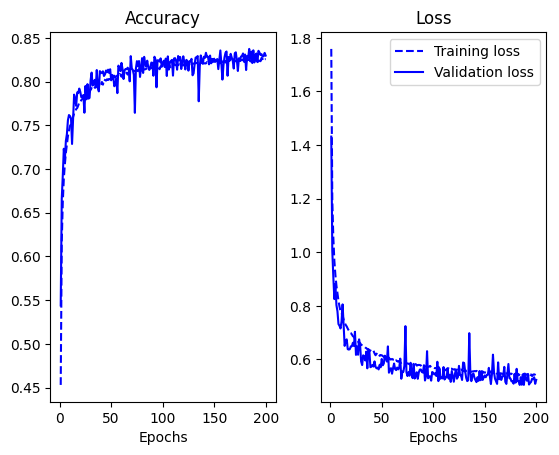

In [20]:
fig, (ax1,ax2) = plt.subplots(1,2)
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
ax1.plot(epochs, accuracy, 'b--', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax2.plot(epochs, loss, 'b--', label='Training loss')
ax2.plot(epochs, val_loss, 'b',label='Validation loss')
ax1.set_title('Accuracy')
ax2.set_title('Loss')
ax1.set_xlabel('Epochs')

ax2.set_xlabel('Epochs')

plt.legend()
plt.show()

In [21]:
model.load_weights('/content/drive/MyDrive/keras/final_model.keras')

In [22]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 1s - loss: 0.5048 - accuracy: 0.8373 - 1s/epoch - 23ms/step


In [23]:
test_dataset = test_ds_norm.map(lambda x, y: (255*x, y))

In [24]:
y_true = []
x_test = []
for x, y in test_dataset:
    y = y.numpy()
    y_true.append(y)
    x_test.append(x)

In [25]:
y_true = [item for sublist in y_true for item in sublist]

In [26]:
len(y_true)

7500

In [27]:
y_true[0]

0

In [28]:
x_test = [item for sublist in x_test for item in sublist]

In [29]:
len(x_test)

7500

In [30]:
y_pred = model.predict(
    test_ds_norm,
    batch_size=None,
    verbose="auto",
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

59/59 [==============================] - 1s 22ms/step


In [31]:
y_pred = y_pred.argmax(axis=1)

In [32]:
y_pred.shape

(7500,)

In [33]:
label_dict = {0:'blouse', 1:'dhoti_pants', 2:'dupattas', 3:'gowns', 4:'kurta_men', 5:'leggings_and_salwars', 6:'lehenga',
          7:'mojaris_men', 8:'mojaris_women', 9:'nehru_jackets', 10:'palazzos', 11:'petticoats', 12:'sherwanis', 13:'saree',
           14:'women_kurta'}

In [34]:
def tensor_to_image(tensor):
    tensor = np.array(tensor, dtype=np.uint8)
    tensor = np.squeeze(tensor, axis=2)
    return Image.fromarray(tensor)

In [35]:
x_test[0].shape

TensorShape([70, 70, 1])

True label: blouse. Predicted label: blouse


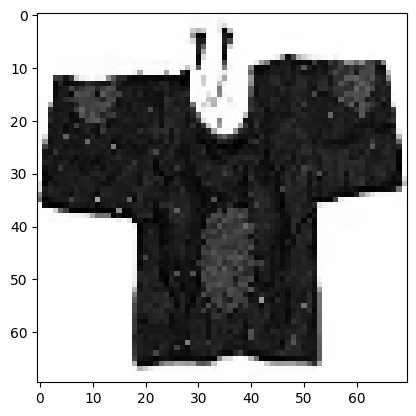

In [36]:
img = tensor_to_image(x_test[1])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[1]]}. Predicted label: {label_dict[y_pred[1]]}')


True label: sherwanis. Predicted label: sherwanis


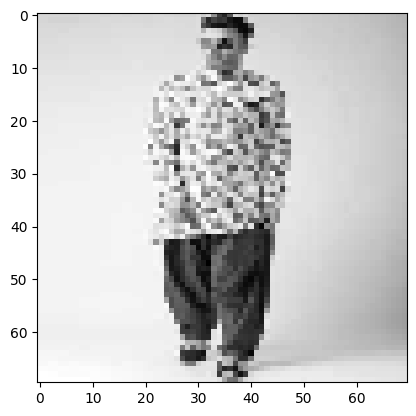

In [37]:
img = tensor_to_image(x_test[6500])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[6500]]}. Predicted label: {label_dict[y_pred[6500]]}')

True label: dupattas. Predicted label: women_kurta


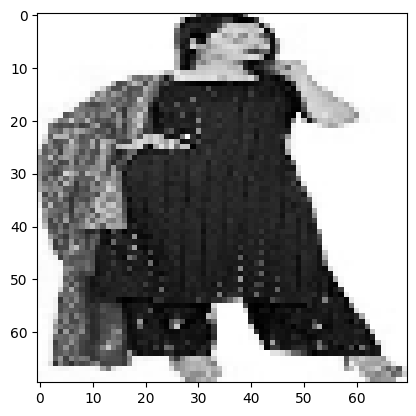

In [38]:
img = tensor_to_image(x_test[1120])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[1120]]}. Predicted label: {label_dict[y_pred[1120]]}')

True label: dupattas. Predicted label: dupattas


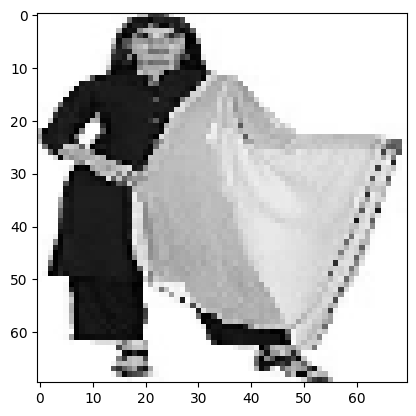

In [39]:
img = tensor_to_image(x_test[1300])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[1300]]}. Predicted label: {label_dict[y_pred[1300]]}')

True label: women_kurta. Predicted label: women_kurta


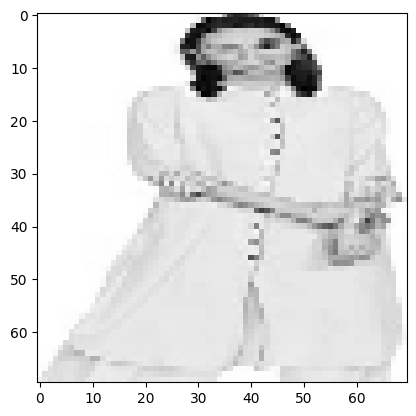

In [40]:
img = tensor_to_image(x_test[7000])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[7000]]}. Predicted label: {label_dict[y_pred[7000]]}')


True label: saree. Predicted label: saree


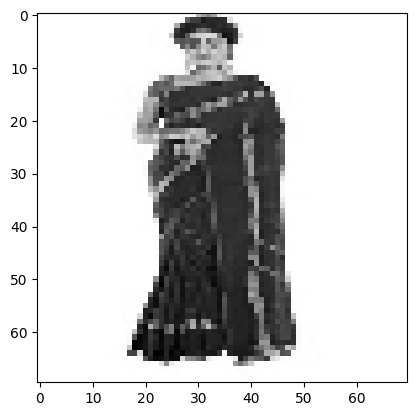

In [41]:
img = tensor_to_image(x_test[6000])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[6000]]}. Predicted label: {label_dict[y_pred[6000]]}')

In [42]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[480,   0,   6,   1,   0,   0,   0,   2,   2,   1,   0,   0,   0,
          5,   3],
       [  5, 320,   8,   3,  11,  57,   1,   3,   1,   1,   7,  10,   4,
          5,  64],
       [  6,   0, 352,  10,   0,  19,  12,   0,   1,   1,   0,   2,   0,
         20,  77],
       [  2,   3,  25, 274,   1,   5,  24,   0,   0,   1,   1,   5,   1,
          9, 149],
       [  0,   5,   1,   0, 475,   0,   0,   0,   0,   9,   0,   0,   8,
          0,   2],
       [  0,  26,   9,   1,   1, 433,   0,   1,   0,   0,  25,   0,   0,
          1,   3],
       [  1,   0,   2,  21,   0,   0, 470,   0,   0,   0,   3,   1,   0,
          0,   2],
       [  6,   2,   4,   0,   0,   1,   2, 425,  49,   0,   0,   2,   3,
          6,   0],
       [  7,   2,   4,   1,   1,   2,   1,  70, 407,   0,   1,   0,   2,
          2,   0],
       [  1,   0,   1,   1,  21,   1,   0,   0,   0, 468,   1,   0,   5,
          1,   0],
       [  0,   3,   1,   1,   1,  60,  17,   0,   0,   0, 408,   6,   2,
       

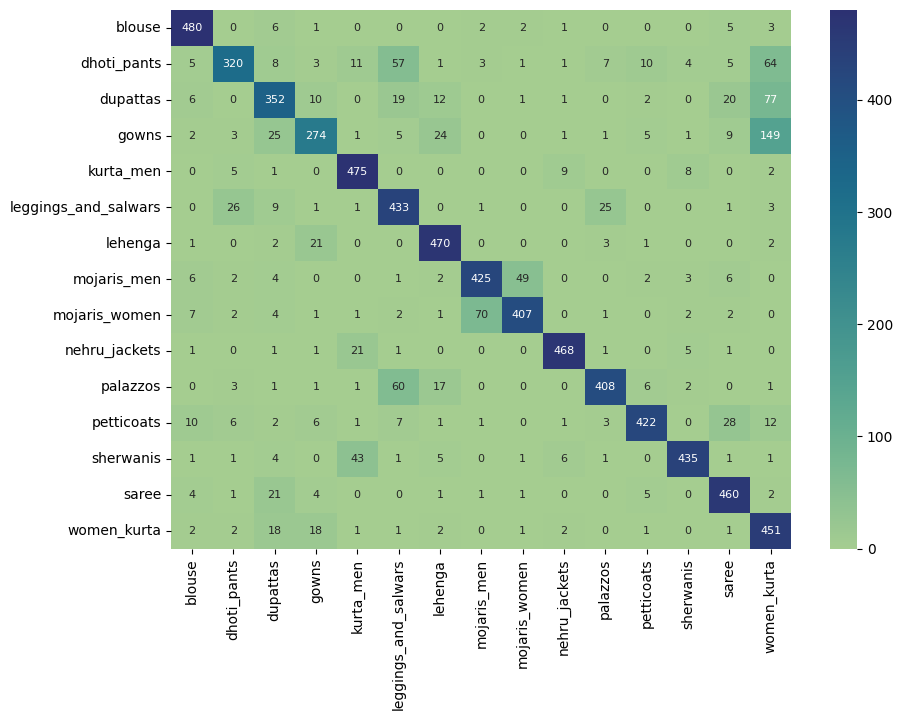

In [43]:
df_cm = pd.DataFrame(cm, index = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta'],
                  columns = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta'])
plt.figure(figsize = (10,7))
_ = sns.heatmap(df_cm, annot=True, annot_kws={"size":8}, fmt='d', cmap='crest')

In [44]:
from google. colab import runtime
runtime.unassign()